<a href="https://colab.research.google.com/github/Rotha-Vichet/MLHW/blob/main/BitcoinAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae

In [2]:
from google.colab import files
upload = files.upload()

Saving AMC.csv to AMC.csv


In [3]:
dataset = pd.read_csv('AMC.csv')
dataset.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,27.420000,28.129999,26.420000,26.520000,26.520000,26740900
1,2022-01-04,26.670000,26.670000,24.639999,25.490000,25.490000,33347900
2,2022-01-05,25.170000,25.299999,22.360001,22.750000,22.750000,45172100
3,2022-01-06,22.959999,23.770000,20.799999,22.459999,22.459999,59112700
4,2022-01-07,23.610001,24.299999,22.440001,22.990000,22.990000,49481000


In [4]:
dataset.isna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
97,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False
99,False,False,False,False,False,False,False
100,False,False,False,False,False,False,False


In [5]:
dataset["Date"] = pd.to_datetime(dataset["Date"])
dataset.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,27.420000,28.129999,26.420000,26.520000,26.520000,26740900
1,2022-01-04,26.670000,26.670000,24.639999,25.490000,25.490000,33347900
2,2022-01-05,25.170000,25.299999,22.360001,22.750000,22.750000,45172100
3,2022-01-06,22.959999,23.770000,20.799999,22.459999,22.459999,59112700
4,2022-01-07,23.610001,24.299999,22.440001,22.990000,22.990000,49481000


1. Go to yahoo finance
2. download the stock or crypto dataset based on your wish
3. Duration of dataset : 1-jan-2022 to 1- may-2022
4. take the independent varaible value from 2-may-2022
5. Give the input and predict the value 
6. Compare the predicted result with actual value of 2 may- 2022
7. you can find the efficiency


In [6]:
#select the variables

x_variable = ['Low','High','Volume' ] #input, Multiple input
y_variable = ['Close'] #output

len(x_variable)
#reshape variable
x = dataset[x_variable].values.reshape(-1,3) # 1st value is -1, next value is the length of x_variable
y = dataset[y_variable].values.reshape(-1,1)
print(x.shape)
print(y.shape)

(102, 3)
(102, 1)


In [7]:
#split the dataset
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.2) # 80% for train, 20% for testing
print(x_train.shape)
print(x_test.shape)

(81, 3)
(21, 3)


In [8]:
#build a model(multipleLinear)
Linear_regression = LinearRegression()

In [9]:
#training 
model = Linear_regression.fit(x_train, y_train)

In [10]:
dataset.isnull()
dataset.isnull().sum()/ len(dataset)

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

In [11]:
# finding intercept & slope (Coeficient)
Q_0 = model.intercept_
print(Q_0)
Q_1 = model.coef_
print(Q_1)

[0.47102966]
[[2.77072544e-01 6.62741442e-01 2.76362311e-09]]


In [12]:
y_predict = model.predict(x_test)
print(y_predict)

[[22.43232242]
 [13.5098783 ]
 [24.34061817]
 [15.53946307]
 [14.14342449]
 [18.28590344]
 [18.32222731]
 [20.51208794]
 [15.31705153]
 [18.51398271]
 [22.2838707 ]
 [10.97766091]
 [22.92990104]
 [23.59660331]
 [19.0934679 ]
 [13.06077569]
 [17.86479573]
 [25.06557215]
 [15.14297004]
 [26.50810414]
 [16.3441109 ]]


In [13]:
#Take the independent variable value from 2-May-2022
x_assum = np.array([38156.56,39074.97,32922642426]) # x_assum is the value of May 02, 2022 
x_assum = x_assum.reshape(1,-1)
#Give the input and predict the value
y_pred = model.predict(x_assum)
print(y_pred)

[[36560.19390998]]


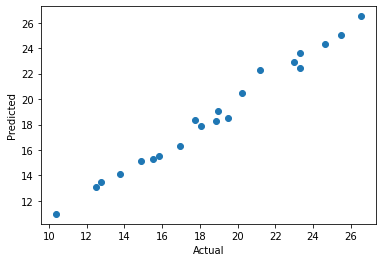

In [14]:
#graph
plt.scatter(y_test,y_predict);
plt.xlabel('Actual');
plt.ylabel('Predicted');